In [138]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage.feature import canny

img_path = '../../data/'

AREA = 4

In [139]:
def detect_stones(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2.GaussianBlur(img, (3, 3), cv2.BORDER_DEFAULT)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    img = canny(img).astype(np.uint8)

    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    plt.imshow(img, cmap='gray')
    plt.show()
    return contours

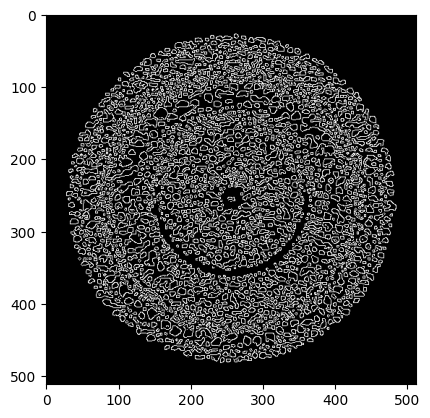

134


In [140]:
img = cv2.imread(img_path + 'stones.jpg')
contours = detect_stones(img)
# contours = tuple(filter(lambda x: int(cv2.contourArea(x)) == AREA ** 2, contours))
cnt = 0
for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if int(w) == AREA and int(h) == AREA:
            cnt += 1
            cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)
cv2.imwrite(img_path + 'stones_first.png', img)
print(cnt)

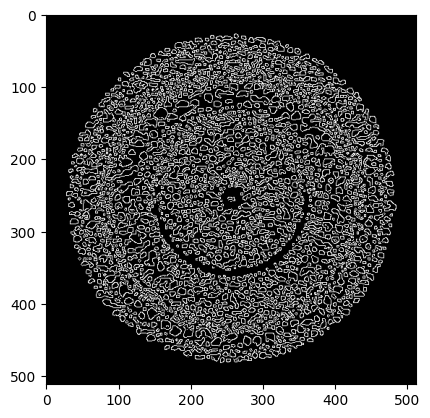

95


In [141]:
img = cv2.imread(img_path + 'stones.jpg')
contours = detect_stones(img)
# contours = tuple(filter(lambda x: int(cv2.contourArea(x)) == AREA ** 2, contours))
cnt = 0
for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if (int(w) == AREA and int(h) < AREA) or (int(h) == AREA and int(w) < AREA):
            cnt += 1
            cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)
cv2.imwrite(img_path + 'stones_second.png', img)
print(cnt)